### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(12, 10)})

### Loading Dataset

In [2]:
data = pd.read_csv('titanic_data.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Types od Features :**
- **Categorical**  - Sex and Embarked
- **Continuous**   - Age, Fare
- **Discrete**     - SibSp, Parch
- **Alphanumeric** - Cabin

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Numerical Value Analysis

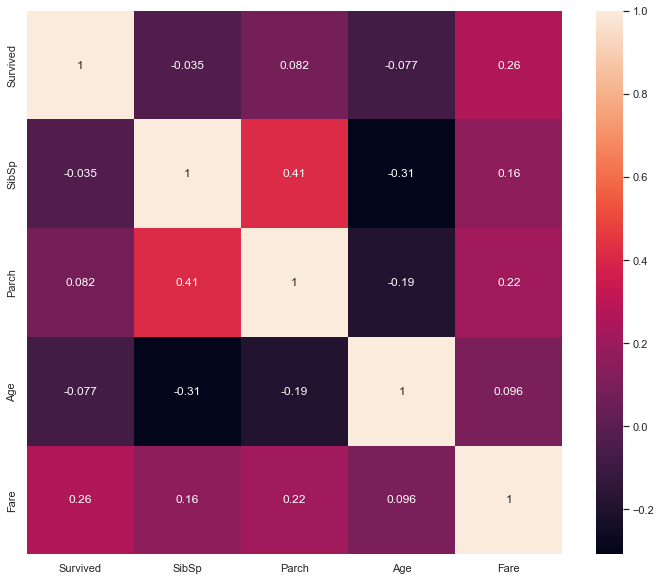

In [7]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True)

**Conclusion :**

Only Fare feature seems to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

Here we can see Age is not showing not important parameter, but we know that most of Children and Women were saved by emergency boat.

So, we have to do Data Exploration to know to know the clear picture-

**SibSp** - How many children you have on that ship

## sibsp - Number of siblings / spouses aboard the Titanic

In [8]:
data['SibSp'].nunique()

7

In [9]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

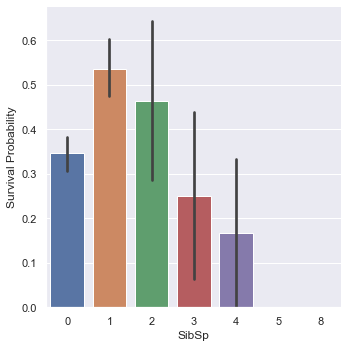

In [16]:
sns.catplot(x = "SibSp", y = "Survived", data = data, kind = "bar").set_ylabels("Survival Probability")

## Age

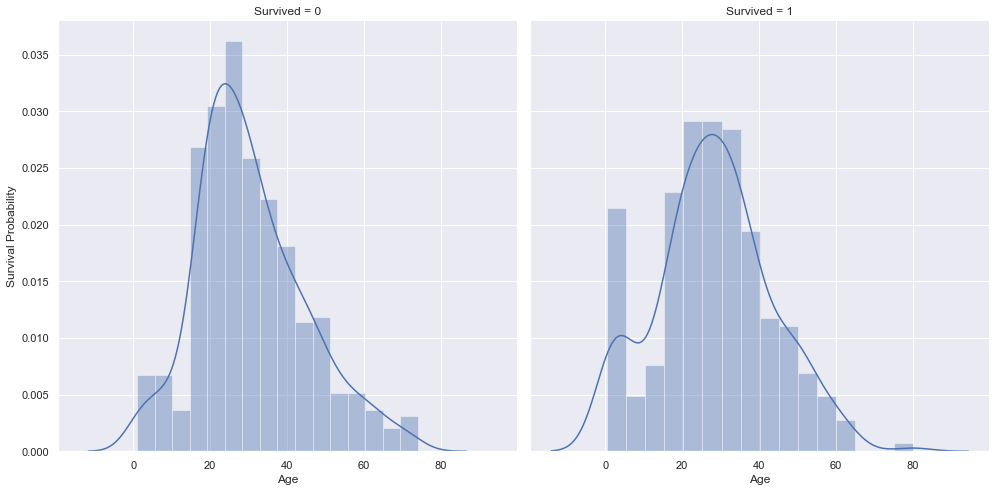

In [14]:
age_visual = sns.FacetGrid(data, col = "Survived", height = 7)
age_visual = age_visual.map(sns.distplot, 'Age').set_ylabels('Survival Probability')

**Important Note** - factorplot is catplot
FacetGrid size -> changed to height.

For codes to run

Here we can see Gaussian Distribution -> because here is a data for population, so bell shaped graph we can see.
Also we can see age distribution is not similar to those who died and those who survived.
There is a peak corresponding to young passengers.
And there was a Higher chance of Old people to die as compared to survival one.
And we can se very young passengers have more chances of survival.

## Sex

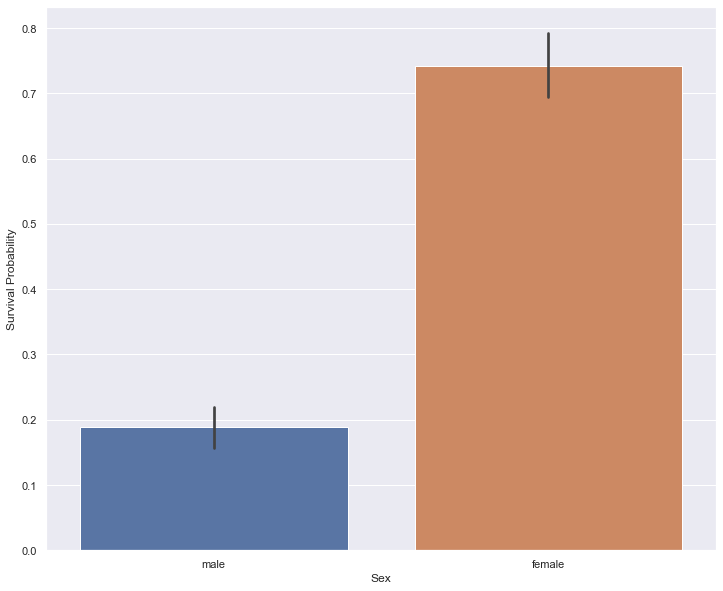

In [20]:
age_plot = sns.barplot(x = 'Sex', y = 'Survived', data = data).set_ylabel('Survival Probability')

In [22]:
data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


Female - Huge chance of Survival

## <Font color = "green">PClass or Passengers class</font>

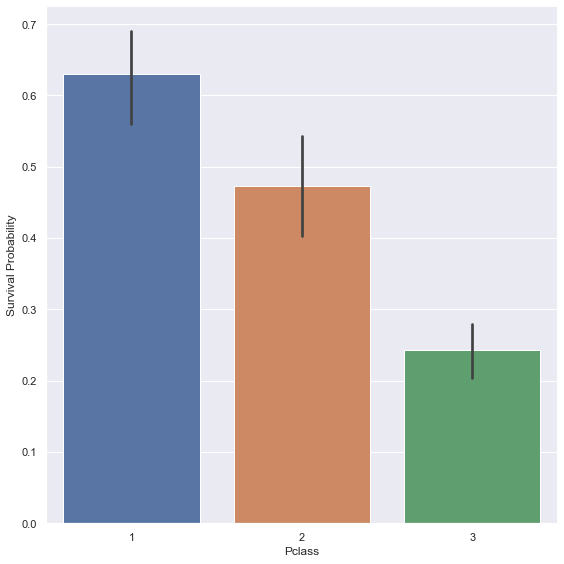

In [26]:
pclass = sns.catplot(x = "Pclass", y = "Survived", data = data, kind = "bar", height = 8)
pclass = pclass.set_ylabels("Survival Probability")


Point to Note -

- Passengers of First Class has Higher chances of survival

### For further division of Pclass survival parameters in Gender -

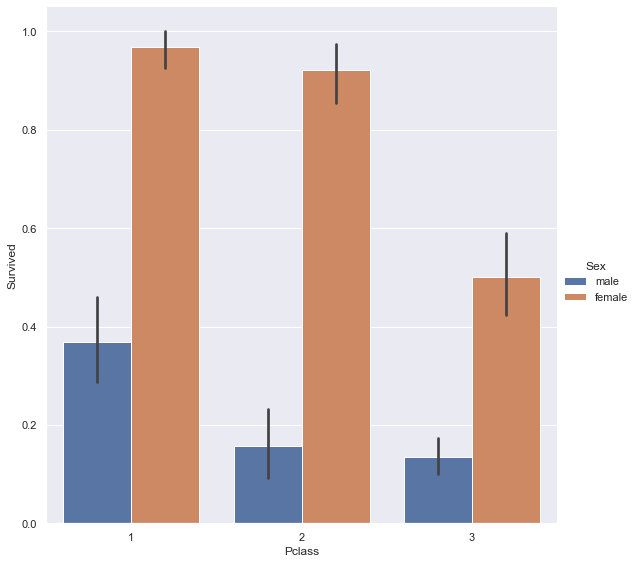

In [27]:
sns.catplot(x = "Pclass", y = "Survived", data = data, kind = "bar", height = 8, hue = 'Sex')
pclass = pclass.set_ylabels("Survival Probability")

## <font color ="green">Embarked</font>

Whether there is an influence on the survival of a passenger based on from which station person has started his journey

In [29]:
data['Embarked'].isnull().sum()

2

In [30]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Here we can see majority from Southampton.
There are two null values, so we can fill these two with Southampton data.

In [31]:
data['Embarked'] = data['Embarked'].fillna('S')

In this scenaria it shouldn't have any influence on your survival probability

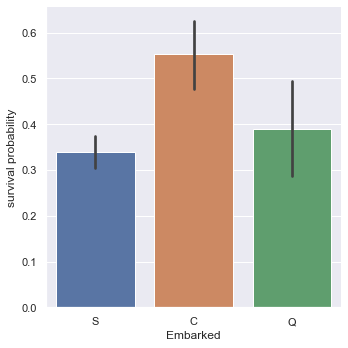

In [33]:
g = sns.catplot(x = 'Embarked', y = 'Survived', data = data, kind = "bar")
g = g.set_ylabels("survival probability")

But to surprise those who taken ship from Cherbourg station had the higher chances of Survival.
So the passengers from Cherbourg is having higher chances 

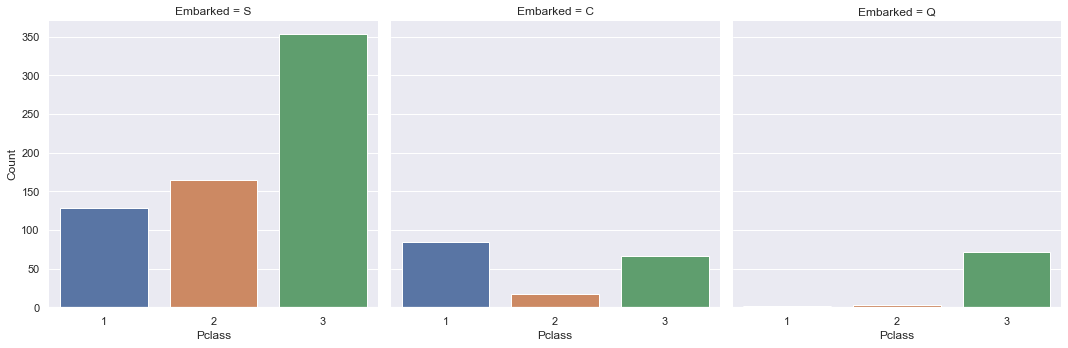

In [49]:
# Explore Pclass vs Embarked
g = sns.catplot(x ="Pclass", col = "Embarked", data = data, kind = "count")
g.despine(left = True)
g = g.set_ylabels('Count')

So many of passengers from Third class are from Southampton, that means survival probabilty from Southampton should be less.
But for Cherbourge and embarkment like first class passengers are more or less same, so it not making much sense.

### Now If we Analyse Gender and Embarkement

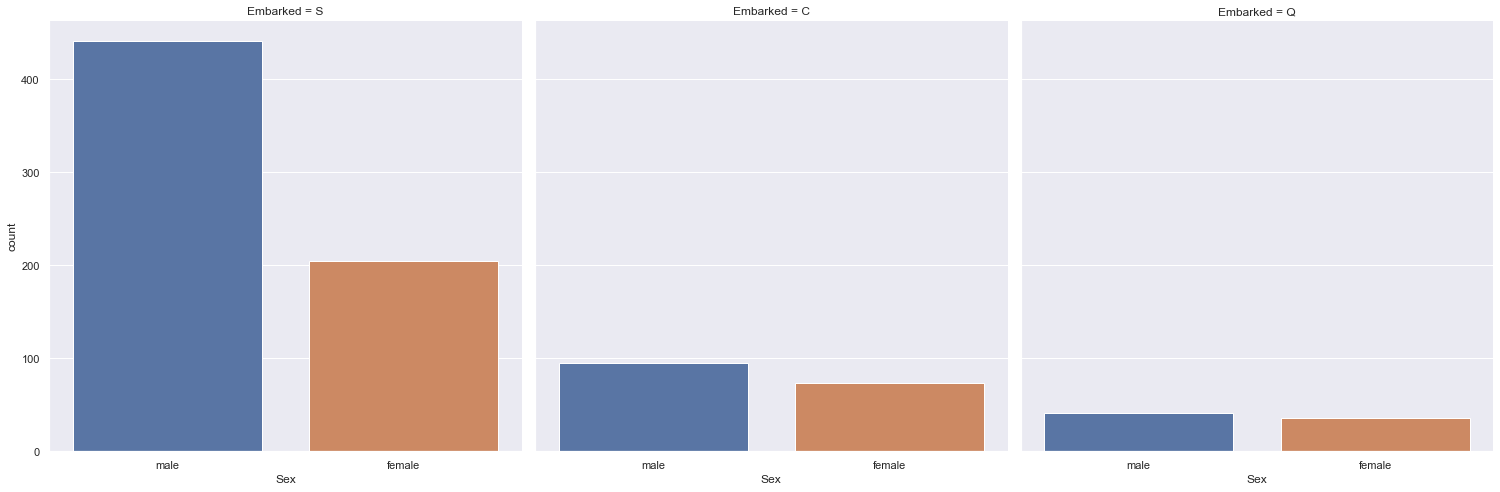

In [47]:
g = sns.catplot(x ="Sex", col = "Embarked", data = data, height = 7, kind = "count")

- In case of Embarkment here, there are 644 passengers from Southampton and out of them Majority of them were males. That is why survival probability for Southampton was less.
- From Queenslasnd majority of passengers are from Third class and Male Female distribution was almost similar, that is why they have survival highs.
- For Cherbourg, Male and Female almost equal proportion and majority of them from the First class, thats why cherbourg has higher survival.

**Note** - Now we know that Embarkment is also very Important parameter which is coming from the **class** of that passenger and the **gender** of that passenger.

### Preparing Data for Training -

In [50]:
data = pd.read_csv('titanic_data.csv')

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Here we can see so many of the Null values, we cant remove that data because it is a huge no. We fill with the mean but that won't be realistic.

- We can see there is a bell shaped curve "Gaussian curve" and we know in Standard Normal Distribution, we having mean and Standard deviation and around 64% of that data lies, u- sigma and u + sigma

- So where ever we have the Null values, I can randomly take out value within this range and will put into this Null Value cases and that how we can complete our age data.

In [58]:
mean = data['Age'].mean()
std = data['Age'].std()

is_null = data['Age'].isnull().sum()

In [60]:
print(mean, std, is_null)

29.69911764705882 14.526497332334042 177


In [61]:
rand_age = np.random.randint(mean-std, mean+std, size = is_null)

In [62]:
rand_age

array([18, 42, 39, 21, 31, 20, 31, 21, 34, 21, 19, 15, 16, 31, 18, 40, 40,
       30, 35, 41, 17, 15, 27, 17, 23, 25, 29, 27, 42, 20, 32, 25, 34, 24,
       28, 22, 35, 34, 15, 32, 34, 43, 31, 22, 31, 16, 25, 15, 23, 33, 18,
       31, 35, 34, 26, 30, 23, 39, 23, 24, 21, 17, 34, 16, 25, 23, 43, 19,
       22, 37, 21, 35, 15, 18, 33, 39, 42, 39, 38, 35, 15, 28, 40, 27, 17,
       30, 38, 40, 30, 37, 25, 17, 26, 16, 28, 16, 27, 42, 27, 41, 29, 16,
       30, 42, 38, 31, 28, 39, 15, 24, 17, 37, 38, 35, 31, 40, 41, 21, 39,
       20, 37, 32, 35, 29, 32, 24, 19, 15, 21, 26, 16, 39, 28, 22, 36, 25,
       17, 18, 27, 41, 21, 29, 35, 35, 21, 29, 33, 21, 19, 27, 43, 34, 21,
       39, 16, 40, 35, 36, 21, 38, 36, 42, 20, 33, 23, 33, 40, 27, 34, 17,
       15, 22, 36, 31, 17, 32, 39])

In [63]:
type(rand_age)

numpy.ndarray

In [67]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age 

# It will check where the value will be True there for null values there random age values will be put.

In [69]:
data['Age'] = a

# So all the values in Age is replaced by the value created in a

In [70]:
data['Age'].isnull().sum()

# Now there is no null values all of them are treated with random age values.

0

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
data['Embarked'] = data['Embarked'].fillna('S')

# Since we know that the majority of embarke are from S so, we are putting S in place of null values in Embarked.

In [74]:
# Dropping all the non important parameters -

col_to_drop = ['PassengerId', 'Cabin', 'Ticket', 'Name']
data.drop(col_to_drop, axis=1, inplace = True)

In [75]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Also we need to treat categorical parameters - Genders and Embarked

In [79]:
genders = {'male': 0, 'female': 1} 
data['Sex'] = data['Sex'].map(genders)

In [82]:
ports = {'S':0, 'C':1, 'Q':2}

data['Embarked'] = data['Embarked'].map(ports)

In [83]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Splitting the Data

In [84]:
x = data.drop(data.columns[[0]], axis =1)
y = data['Survived']

In [111]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0)

### Scaling

In [112]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

### Classification

In [113]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators = 1000)

In [114]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [115]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [116]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [117]:
print("Logistic Regression :", round(logreg_acc*100, 2))
print("Support Vector      :", round(svc_classifier_acc*100, 2))
print("Decision Tree       :", round(dt_classifier_acc*100, 2))
print("K-NN Classifier     :", round(knn_classifier_acc*100, 2))
print("Random Forest       :", round(rf_classifier_acc*100, 2))

Logistic Regression : 81.34
Support Vector      : 82.09
Decision Tree       : 74.63
K-NN Classifier     : 78.36
Random Forest       : 80.22
